# Richter's Predictor: Modeling Earthquake Damage

Based on aspects of building location and construction, the goal is to predict the level of damage to buildings caused by the 2015 Gorkha earthquake in Nepal.

The data was collected through surveys by [Kathmandu Living Labs](http://www.kathmandulivinglabs.org) and the [Central Bureau of Statistics](https://cbs.gov.np), which works under the National Planning Commission Secretariat of Nepal. This survey is **one of the largest post-disaster datasets ever collected**, containing valuable information on earthquake impacts, household conditions, and socio-economic-demographic statistics.

<img src="img/eq_1.jpeg">

***
## Description of Features
***

The dataset mainly consists of information on the buildings' structure and their legal ownership. Each row in the dataset represents a specific building in the region that was hit by Gorkha earthquake.

There are 39 columns in this dataset, where the `building_id` column is a unique and random identifier. The remaining 38 features are described in the section below. Categorical variables have been obfuscated random lowercase ascii characters. The appearance of the same character in distinct columns does not imply the same original value.

**Description**

- `geo_level_1_id`, `geo_level_2_id`, `geo_level_3_id` (type: int): geographic region in which building exists, from largest (level 1) to most specific sub-region (level 3). Possible values: level 1: 0-30, level 2: 0-1427, level 3: 0-12567.
- `count_floors_pre_eq` (type: int): number of floors in the building before the earthquake.
- `age` (type: int): age of the building in years.
- `area_percentage` (type: int): normalized area of the building footprint.
- `height_percentage` (type: int): normalized height of the building footprint.
- `land_surface_condition` (type: categorical): surface condition of the land where the building was built. Possible values: n, o, t.
- `foundation_type` (type: categorical): type of foundation used while building. Possible values: h, i, r, u, w.
- `roof_type` (type: categorical): type of roof used while building. Possible values: n, q, x.
- `ground_floor_type` (type: categorical): type of the ground floor. Possible values: f, m, v, x, z.
- `other_floor_type` (type: categorical): type of constructions used in higher than the ground floors (except of roof). Possible values: j, q, s, x.
- `position` (type: categorical): position of the building. Possible values: j, o, s, t.
- `plan_configuration` (type: categorical): building plan configuration. Possible values: a, c, d, f, m, n, o, q, s, u.
- `has_superstructure_adobe_mud` (type: binary): flag variable that indicates if the superstructure was made of Adobe/Mud.
- `has_superstructure_mud_mortar_stone` (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Stone.
- `has_superstructure_stone_flag` (type: binary): flag variable that indicates if the superstructure was made of Stone.
- `has_superstructure_cement_mortar_stone` (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Stone.
- `has_superstructure_mud_mortar_brick` (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Brick.
- `has_superstructure_cement_mortar_brick` (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Brick.
- `has_superstructure_timber` (type: binary): flag variable that indicates if the superstructure was made of Timber.
- `has_superstructure_bamboo` (type: binary): flag variable that indicates if the superstructure was made of Bamboo.
- `has_superstructure_rc_non_engineered` (type: binary): flag variable that indicates if the superstructure was made of non-engineered reinforced concrete.
- `has_superstructure_rc_engineered` (type: binary): flag variable that indicates if the superstructure was made of engineered reinforced concrete.
- `has_superstructure_other` (type: binary): flag variable that indicates if the superstructure was made of any other material.
- `legal_ownership_status` (type: categorical): legal ownership status of the land where building was built. Possible values: a, r, v, w.
- `count_families` (type: int): number of families that live in the building.
- `has_secondary_use` (type: binary): flag variable that indicates if the building was used for any secondary purpose.
- `has_secondary_use_agriculture` (type: binary): flag variable that indicates if the building was used for agricultural purposes.
- `has_secondary_use_hotel` (type: binary): flag variable that indicates if the building was used as a hotel.
- `has_secondary_use_rental` (type: binary): flag variable that indicates if the building was used for rental purposes.
- `has_secondary_use_institution` (type: binary): flag variable that indicates if the building was used as a location of any institution.
- `has_secondary_use_school` (type: binary): flag variable that indicates if the building was used as a school.
- `has_secondary_use_industry` (type: binary): flag variable that indicates if the building was used for industrial purposes.
- `has_secondary_use_health_post` (type: binary): flag variable that indicates if the building was used as a health post.
- `has_secondary_use_gov_office` (type: binary): flag variable that indicates if the building was used fas a government office.
- `has_secondary_use_use_police` (type: binary): flag variable that indicates if the building was used as a police station.
- `has_secondary_use_other` (type: binary): flag variable that indicates if the building was secondarily used for other purposes.



Features have information on aspects of structure's location and construction. For instance, three distinct `geo_level_id`'s (1,2, and 3 respectively) represent the district, municipality/VDC and ward location of the surveyed structure. `foundation_type`, `roof_type`, `has_superstructure_mud`, and many others like these give us information on different aspects of the building's construction. Some features are continuous, for example age, height percentage, etc., but most are categorical. Among the categorical ones, most are dummies, some have a few categories encoded with strings, and a few like `geo_level_2_id` and `geo_level_3_id` have way too many categories (more than 100) inside them. These different cases need to be handled accordingly.

In some of the categorical varaibles, it is not clear what the encoded characters representing different levels of the categorical variable really mean in the physical context of the structure. We were able to find the original dataset from which the data for this competition has most likely been subsampled. From that, we have gotten some more information on what different levels in each category could possiblly mean; however, we have not yet fully worked out what the character-encoded levels in some of our categorical variables exactly mean in the physical context.

***
## Description of Labels
***

We're trying to predict the ordinal variable `damage_grade`, which represents a level of damage to the building that was hit by the earthquake. There are 3 grades of the damage:

- `1` represents low damage
- `2` represents a medium amount of damage
- `3` represents almost complete destruction

***
## Performance Metric
***

We are predicting the level of damage from 1 to 3. The level of damage is an ordinal variable meaning that ordering is important. This can be viewed as a classification or an ordinal regression problem. (Ordinal regression is sometimes described as an problem somewhere in between classification and regression.)

To measure the performance of our algorithms, we'll use the F1 score which balances the precision and recall of a classifier. Traditionally, the F1 score is used to evaluate performance on a binary classifier, but since we have three possible labels we will use a variant called the micro averaged F1 score.

$$F_{micro} = \frac{2 \cdot P_{micro} \cdot R_{micro}}{P_{micro} + R_{micro}}$$

where

$$P_{micro} = \frac{\sum_{k=1}^{3}TP_{k}}{\sum_{k=1}^{3}(TP_{k} + FP_{k})},~~R_{micro} = \frac{\sum_{k=1}^{3}TP_{k}}{\sum_{k=1}^{3}(TP_{k} + FN_{k})}$$

and *TP* is True Positive, *FP* is False Positive, *FN* is False Negative, and *k* represents each class in 1,2,3.

In Python, we can easily calculate this loss using `sklearn.metrics.f1_score` with the keyword argument `average='micro'`. Here are some references that discuss the micro-averaged F1 score further:

- [Scikit-Learn Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)
- [Blog Post](http://rushdishams.blogspot.com/2011/08/micro-and-macro-average-of-precision.html)

## What is this important?


In April, 2015, a 7.8 magnitude earthquake with an epicenter in the Gorkha District of Nepal devastated the surrounding area, resulting in almost 9,000 deaths and 22,000 injuries. Some of these casualties happened in buildings that collapsed in the earthquake, and may have been preventable if they had withstood the initial ground motion or resulting aftershocks.

Using data on buildings in the affected area and how they were impacted by the earthquake, we'd like to model risk of damage. Accurate models of this kind help first responders plan their initial triage after an earthquake, and help governments direct scarce resources which may be available to mitigate risk before another earthquake happens.

The goal is to predict buildings at risk of earthquake damage. Based on aspects of building location and construction, my goal is to predict the level of damage to buildings caused by the 2015 Gorkha earthquake in Nepal.

This dataset is used to determine the damage grade (low, medium, destructed) correspond to construction attributes and quality. The objective is to propose a machine learning kernel and predict the damage grade accurately. It can be applied to any country or region with similar construction attribute to predict potential damage grade and further enhance their construction work.

The prediction is useful when performing pre-construction earthquake-proof quality determination, construction enhancement work analysis, and post-earthquake fragility quick analysis. By compare to other earthquakes related prediction such as Earthquake prediction that relies on the seismic signal. They are trying to predict the occurrence probability, location, and magnitude with a time-independent machine learning model to create alert for the public. But it is an extremely difficult task due to extraordinarily stochastic. Another prediction example is LANL prediction, this prediction is used to activate the modern failsafe system and mitigate the earthquake damage by working on acoustic and time-series data to predict the final time to failure. In conclusion, construction attribute-based predictions are valuable as it can determine what construction type is cost-effective in reducing damage and save people from earthquake damage.

In [1]:
import pandas as pd
import numpy as np
import os
import re

import missingno as msno 
import string 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [3]:
# Load data set
df_train = pd.read_csv(os.path.join('', 'Richters_Predictor_Modeling_Earthquake_Damage_-_Train_Values.csv'))

In [4]:
df_test = pd.read_csv(os.path.join('', 'Richters_Predictor_Modeling_Earthquake_Damage_-_Test_Values.csv'))

In [5]:
df_labels = pd.read_csv(os.path.join('', 'Richters_Predictor_Modeling_Earthquake_Damage_-_Train_Labels.csv'))

In [6]:
df_labels.damage_grade.value_counts()/len(df_labels.damage_grade)

2    0.568912
3    0.334680
1    0.096408
Name: damage_grade, dtype: float64

**Remarks:**

- According to these results, we can say that there are 56.89% of the building suffered a medium amount of damage, 33.46% of the building were almost completely distructed and 9.64% of the building suffered a low damage.

- Class "low damage" is imbalanced, and might need upsampling. Another option to deal with the imbalance is to choose an appropriate metric, like F1 score or AUC.

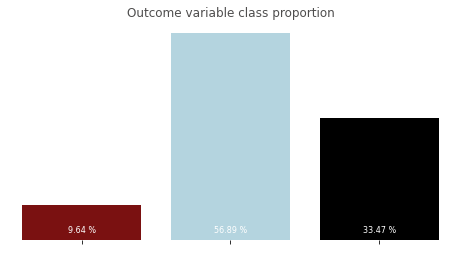

In [7]:
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(data = df_labels, x = df_labels['damage_grade'].value_counts().keys(), y = df_labels['damage_grade'].value_counts()/len(df_labels)*100, 
            palette=['darkred', 'lightblue', 'black'])
plt.xlabel('')
plt.ylabel('')
plt.title('Outcome variable class proportion', size=12, color='#4f4e4e')
plt.xticks(size=8, color='white')
plt.yticks([], [])

plt.text(x=0, y=2, s=" ".join([(round(df_labels['damage_grade'].value_counts()[1]/len(df_labels)*100, 2)).astype('str'), "%"]),  
                 color='white', fontsize=8, horizontalalignment='center')
plt.text(x=1, y=2, s=" ".join([(round(df_labels['damage_grade'].value_counts()[2]/len(df_labels)*100, 2)).astype('str'), "%"]),  
                 color='white', fontsize=8, horizontalalignment='center')
plt.text(x=2, y=2, s=" ".join([(round(df_labels['damage_grade'].value_counts()[3]/len(df_labels)*100, 2)).astype('str'), "%"]),  
                 color='white', fontsize=8, horizontalalignment='center')

sns.despine(left=True, bottom=True);

In [8]:
df_train.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [9]:
df_labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [10]:
df = df_train.merge(df_labels, on='building_id', how='left')
df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

We have 31 continuous columns (int64) and 8 discrete columns (object). Since there are only 8 discrete columns, it will be faster when we perform one-hot encoding and consume lesser ram to store the data into the dataframe.

Another thing to take a look at here is the missing observations and columns, it could be possible that some of the dataset provided has missing data in particular observation (row). 

In [12]:
df.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,0.034332,0.018235,0.068154,0.075268,0.254988,0.085011,0.042590,0.015859,0.014985,0.983949,0.111880,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,0.182081,0.133800,0.252010,0.263824,0.435855,0.278899,0.201931,0.124932,0.121491,0.418389,0.315219,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


Here it is important to take a closer look at the ranges of the values. If the max or min of a feature is significantly different from the mean and from the 75% / 25%, we might want to look into this further to understand if these values make sense in their context.

The mean damage grade is ~2.38, with a standard deviation fo 0.6, indicating that most buildings were severly damaged,

In [13]:
df.duplicated().sum()

0

No duplicates.

Heatmap takes a rectangular data grid as input and then assigns a color intensity to each data cell based on the data value of the cell. This is a great way to get visual clues about the data.

We will generate a heatmap of the output of isnull() in order to detect missing values.

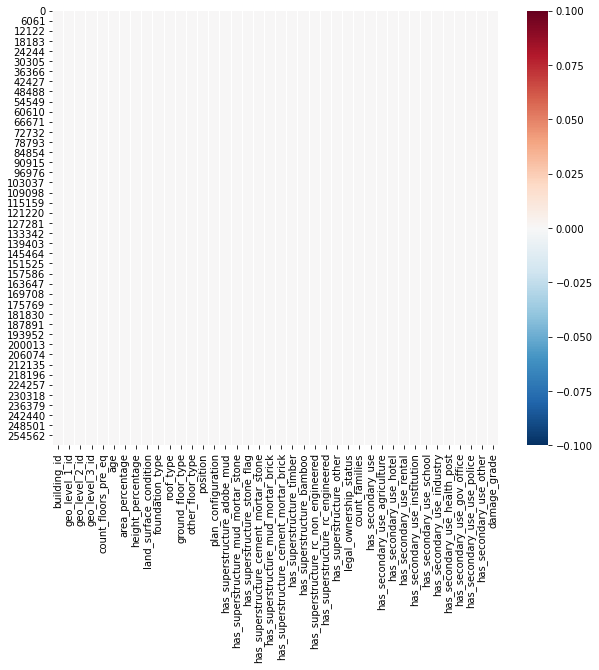

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(), cmap="RdBu_r")
plt.show()

We can handle missing values in many ways:

- Delete: We can delete the rows with the missing values or delete the whole column which has missing values. The dropna() method from Pandas library can be used to accomplish this task.
- Impute: Deleting data might cause huge amount of information loss. So, replacing data might be a better option than deleting. One standard replacement technique is to replace missing values with the average value of the entire column for numerical features, or replace missing values with the most frequent feature for categorical values.
- Predictive filling: Alternatively, you can choose to fill missing values through predictive filling. The interpolate() method will perform a linear interpolation in order to “guess” the missing values and fill the results in the dataset.

In this particular case, we don't seem to have any missing values.

Correlation is a statistical metric for measuring to what extent different variables are interdependent. In other words, when we look at two variables over time, if one variable changes, how does this effect change in the other variable?

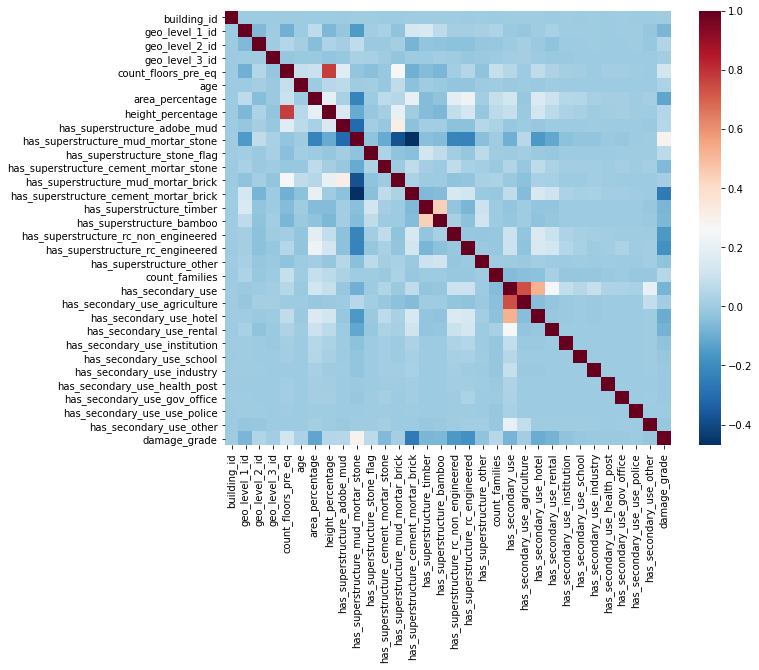

In [15]:
plt.figure(figsize=(10,8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap="RdBu_r")
plt.show()

Correlation heat map is a useful plot to analyze the multivariate relationship. It defines the relationship for each individual variable. The plot has identified that `count_floors` is highly correlated with `height_percentage`. Also, `has_secondary_use` and `has_secondary_use_agriculture` have a high correlation too. When variables are highly correlated it means that both of them are having almost the same distribution, so it won’t provide useful variance if you have a duplicate variable. We can determine later whether to remove the high correlated variables or combine them with PCA.

In [16]:
sns.set_palette("cividis")

In [17]:
subset_features = ['age', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 
                     'area_percentage', 
                     'height_percentage',
                     'count_floors_pre_eq']

/Users/laura/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


<Figure size 800x640 with 0 Axes>

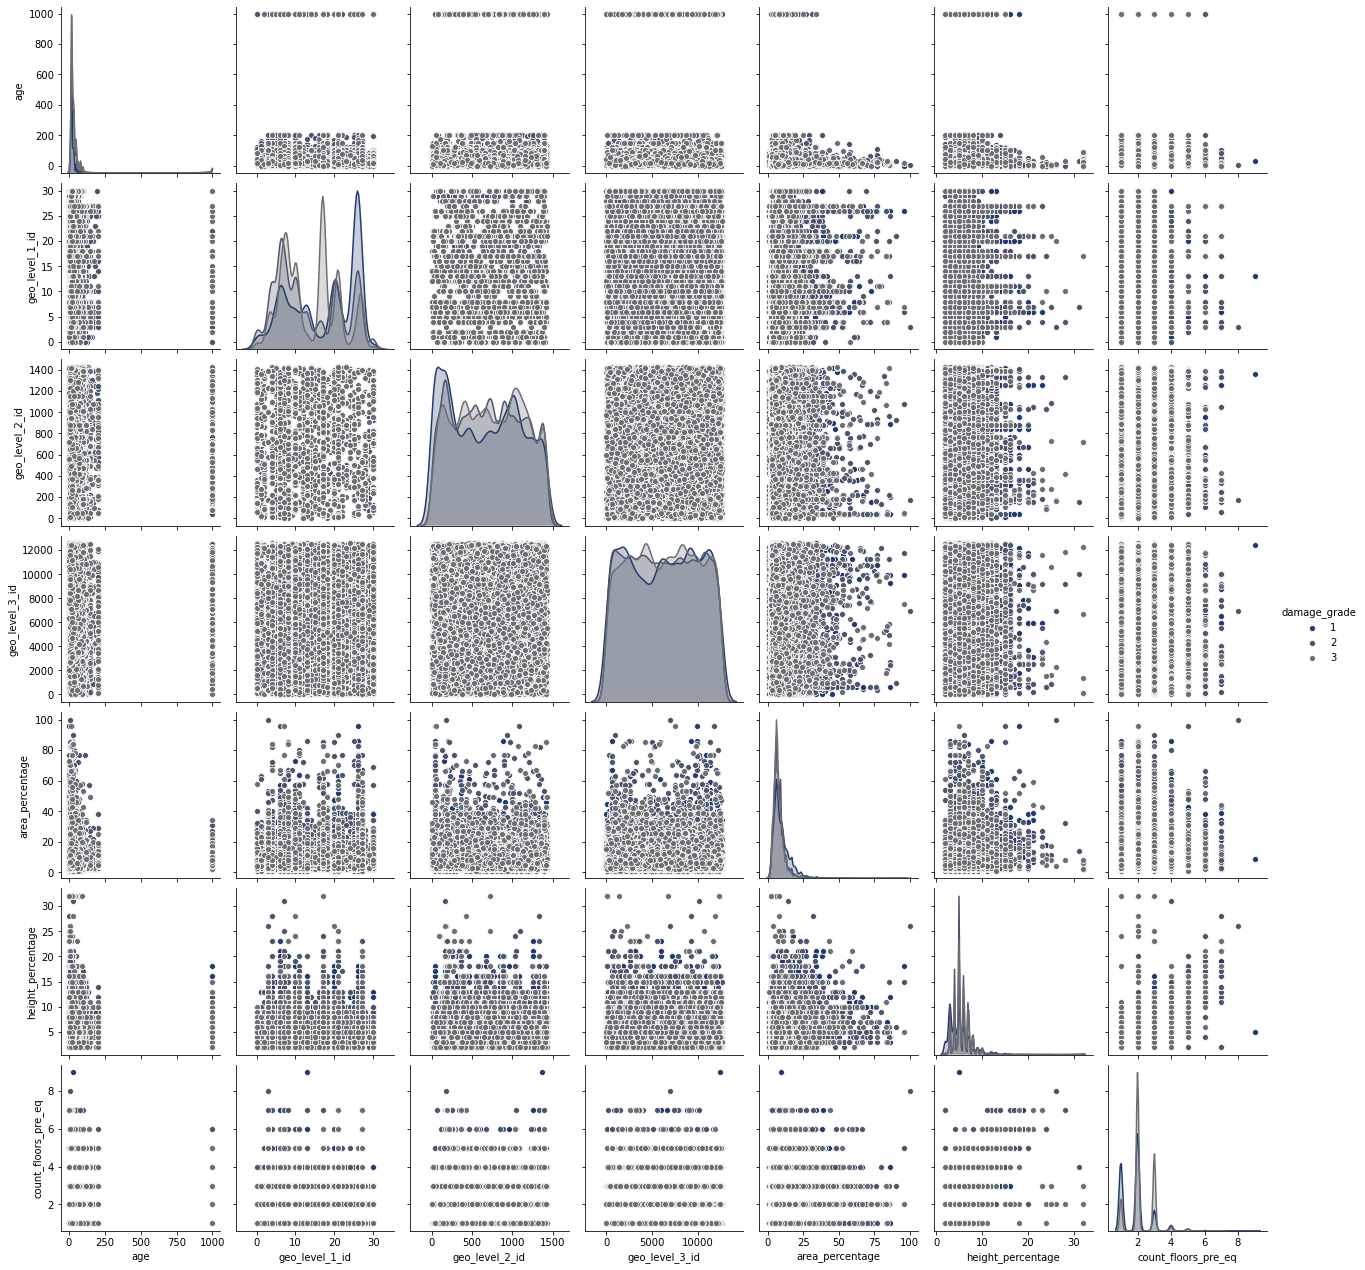

In [18]:
plt.figure(figsize = (10,8), dpi = 80) 
sns.pairplot(df, vars = subset_features, hue = 'damage_grade')
plt.show()

For example, the left-most plot in the second row shows the scatter plot of area_percentage versus age.

The histograms show the frequency distribution, which is a quick view of numeric continuous variable distribution. The interesting point to observe is the small outlier point on the right side of the `age` and `height_percentage` plot.

The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables. 

***
**Analysis of categorical features**
***

In [19]:
df.land_surface_condition.unique()

array(['t', 'o', 'n'], dtype=object)

In [20]:
counts_df = df.groupby(["land_surface_condition", "damage_grade"])["building_id"].count().unstack()
counts_df

damage_grade,1,2,3
land_surface_condition,,,
n,2556,21484,11488
o,602,4708,3006
t,21966,122067,72724


In [21]:
percents_df = counts_df.div(counts_df.sum()).T
percents_df

land_surface_condition,n,o,t
damage_grade,,,
1,0.101735,0.023961,0.874303
2,0.144909,0.031755,0.823336
3,0.131716,0.034465,0.833819


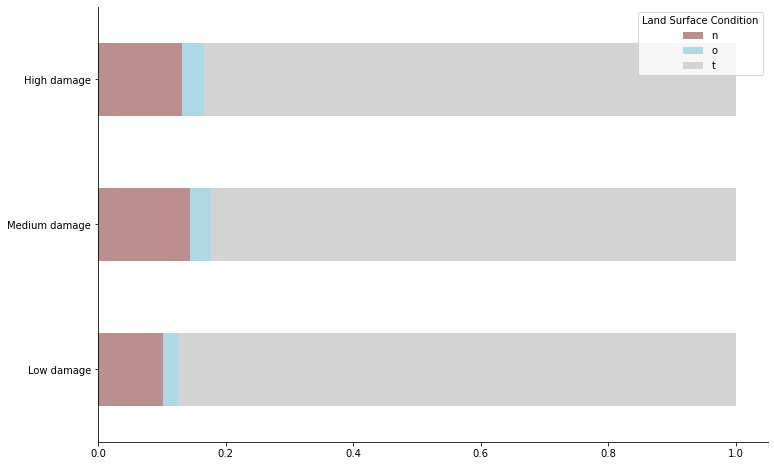

In [22]:
fig, ax = plt.subplots(figsize=(12,8))

percents_df.plot(kind="barh",
                 stacked=True,
                 color=['rosybrown', 'lightblue', 'lightgrey'],
                 ax=ax)
ax.legend(title = "Land Surface Condition")
ax.set_ylabel("")
ax.set_yticklabels(['Low damage', 'Medium damage', 'High damage'], rotation=0)
ax.set_xlabel("")
sns.despine()

In [23]:
df.foundation_type.unique()

array(['r', 'w', 'i', 'u', 'h'], dtype=object)

In [24]:
counts_df = df.groupby(["foundation_type", "damage_grade"])["building_id"].count().unstack()
counts_df

damage_grade,1,2,3
foundation_type,,,
h,358,579,511
i,6004,4354,221
r,10720,125515,82961
u,3689,8541,2030
w,4353,9270,1495


In [25]:
percents_df = counts_df.div(counts_df.sum()).T
percents_df

foundation_type,h,i,r,u,w
damage_grade,,,,,
1,0.014249,0.238975,0.426684,0.146832,0.173261
2,0.003905,0.029368,0.846593,0.057609,0.062526
3,0.005859,0.002534,0.951191,0.023275,0.017141


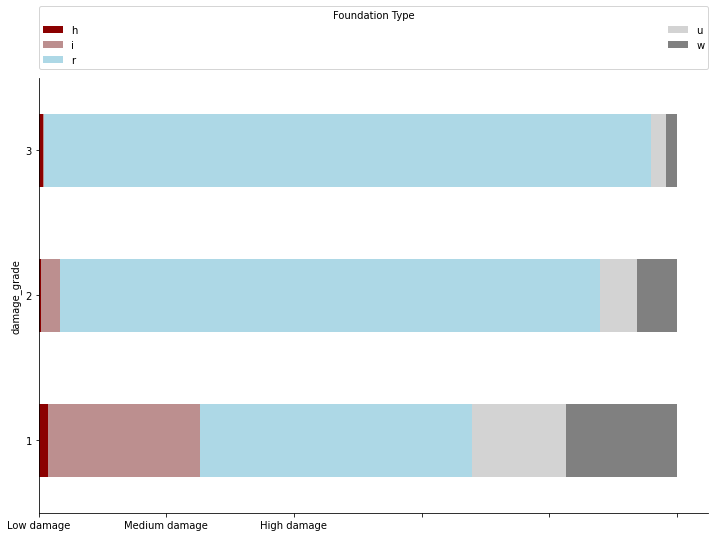

In [26]:
fig, ax = plt.subplots(figsize=(12,8))

percents_df.plot(kind="barh", 
        stacked=True, 
        color = ['darkred', 'rosybrown' , 'lightblue', 'lightgrey', 'grey'],
        ax=ax)

ax.legend(title="Foundation Type",  bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
ax.set_xticklabels(['Low damage', 'Medium damage', 'High damage'], rotation=0)
ax.set_xlabel("")
sns.despine()

It's difficult to estimate without knowing the meaning of the values, however it seems that high damage mainly occurs in `foundation_type` r.

In [27]:
df.position.unique()

array(['t', 's', 'j', 'o'], dtype=object)

In [28]:
counts_df = df.groupby(["position", "damage_grade"])["building_id"].count().unstack()
counts_df

damage_grade,1,2,3
position,,,
j,1675,7899,3708
o,120,1609,604
s,19867,116051,66172
t,3462,22700,16734


In [29]:
percents_df = counts_df.div(counts_df.sum()).T
percents_df

position,j,o,s,t
damage_grade,,,,
1,0.066669,0.004776,0.790758,0.137797
2,0.053278,0.010853,0.782759,0.153110
3,0.042514,0.006925,0.758697,0.191864


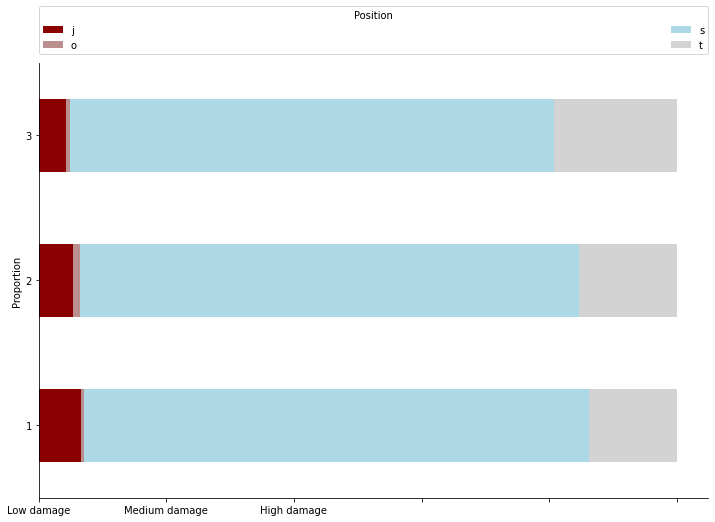

In [30]:
fig, ax = plt.subplots(figsize=(12,8))

percents_df.plot(kind="barh", 
        stacked=True, 
        color = ['darkred', 'rosybrown' , 'lightblue', 'lightgrey'],
        ax=ax)

ax.legend(title="Position",  bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
ax.set_xticklabels(['Low damage', 'Medium damage', 'High damage'], rotation=0)
ax.set_xlabel("")
ax.set_ylabel("Proportion")
sns.despine()

***
**Analysis of numerical features**
***

In [31]:
geo_level_features = [x for x in df.columns if 'geo' in x]

In [32]:
secondary_use_features = [x for x in df.columns if 'secondary' in x]

In [33]:
superstructure_features = [x for x in df.columns if 'super' in x]

In [34]:
selected_features = ['age',
                     'area_percentage', 
                     'height_percentage',
                     'count_floors_pre_eq', 'count_families']

We have seen that `damage_grade` = 2 is much more representated than 1 and about twice more than 3. Let's investigate more, using the `geo_level` as variable: this data represents the geographic region in which building exists, from largest (level 1) to most specific sub-region (level 3). 

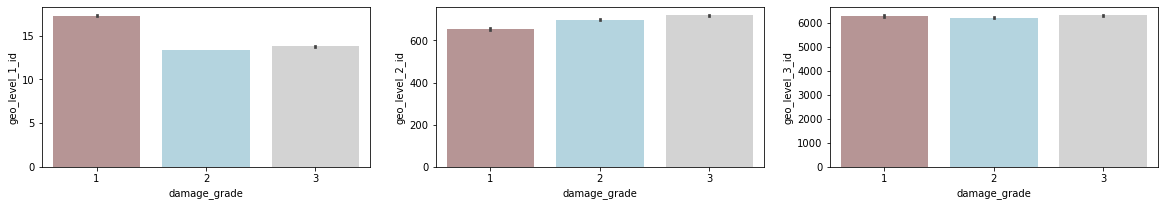

In [35]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(geo_level_features):
    plt.subplot(3, 3, i+1)
    sns.barplot(df['damage_grade'], df[col], palette=['rosybrown', 'lightblue', 'lightgrey'])

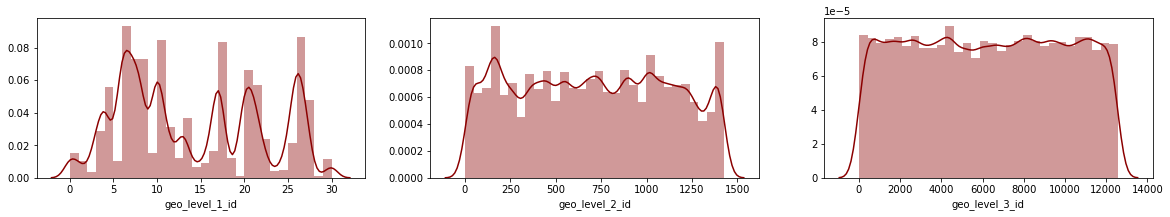

In [37]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(geo_level_features):
    plt.subplot(3, 3, i+1)
    sns.distplot(df[col], bins=30, color='darkred')
    plt.xlabel(col)

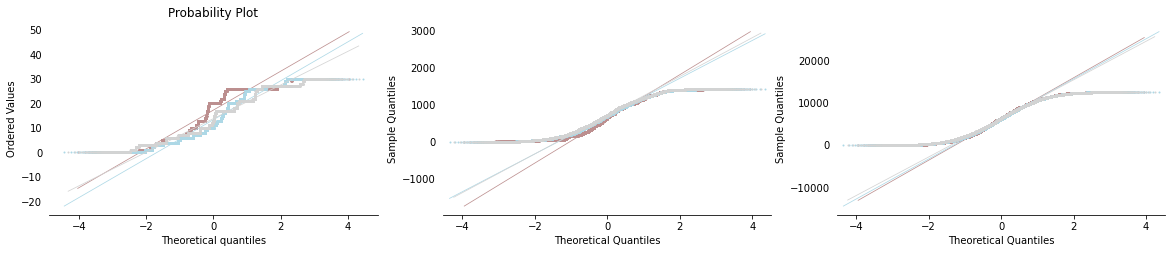

In [38]:
import statsmodels.api as sm
from scipy import stats
from cycler import cycler

fig = plt.figure(figsize=(20, 12))

ax = fig.add_subplot(3, 3, 1)
stats.probplot(df[df['damage_grade']==1]['geo_level_1_id'], dist="norm", plot=plt)
ax.get_lines()[0].set_markerfacecolor('rosybrown')
ax.get_lines()[0].set_markeredgecolor('rosybrown')
ax.get_lines()[0].set_markersize(1.0)
ax.get_lines()[1].set_color('rosybrown')
ax.get_lines()[1].set_linewidth(0.75)


stats.probplot(df[df['damage_grade']==2]['geo_level_1_id'], dist="norm", plot=plt)
ax.get_lines()[2].set_markerfacecolor('lightblue')
ax.get_lines()[2].set_markeredgecolor('lightblue')
ax.get_lines()[2].set_markersize(1.0)
ax.get_lines()[3].set_color('lightblue')
ax.get_lines()[3].set_linewidth(0.75)


stats.probplot(df[df['damage_grade']==3]['geo_level_1_id'], dist="norm", plot=plt)
ax.get_lines()[4].set_markerfacecolor('lightgrey')
ax.get_lines()[4].set_markeredgecolor('lightgrey')
ax.get_lines()[4].set_markersize(1.0)
ax.get_lines()[5].set_color('lightgrey')
ax.get_lines()[5].set_linewidth(0.75)


# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')


ax = fig.add_subplot(3, 3, 2)
sm.graphics.qqplot(df[df['damage_grade']==1]['geo_level_2_id'], line='q', color='blue', ax=ax)
ax.get_lines()[0].set_markerfacecolor('rosybrown')
ax.get_lines()[0].set_markeredgecolor('rosybrown')
ax.get_lines()[0].set_markersize(1.0)
ax.get_lines()[1].set_color('rosybrown')
ax.get_lines()[1].set_linewidth(0.75)

sm.graphics.qqplot(df[df['damage_grade']==2]['geo_level_2_id'], line='q', color='yellow', ax=ax)
ax.get_lines()[2].set_markerfacecolor('lightblue')
ax.get_lines()[2].set_markeredgecolor('lightblue')
ax.get_lines()[2].set_markersize(1.0)
ax.get_lines()[3].set_color('lightblue')
ax.get_lines()[3].set_linewidth(0.75)

sm.graphics.qqplot(df[df['damage_grade']==3]['geo_level_2_id'], line='q', color='green', ax=ax)
ax.get_lines()[4].set_markerfacecolor('lightgrey')
ax.get_lines()[4].set_markeredgecolor('lightgrey')
ax.get_lines()[4].set_markersize(1.0)
ax.get_lines()[5].set_color('lightgrey')
ax.get_lines()[5].set_linewidth(0.75)

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')



ax = fig.add_subplot(3, 3, 3)
sm.graphics.qqplot(df[df['damage_grade']==1]['geo_level_3_id'], line='q', color='blue', ax=ax)
ax.get_lines()[0].set_markerfacecolor('rosybrown')
ax.get_lines()[0].set_markeredgecolor('rosybrown')
ax.get_lines()[0].set_markersize(1.0)
ax.get_lines()[1].set_color('rosybrown')
ax.get_lines()[1].set_linewidth(0.75)

sm.graphics.qqplot(df[df['damage_grade']==2]['geo_level_3_id'], line='q', color='yellow', ax=ax)
ax.get_lines()[2].set_markerfacecolor('lightblue')
ax.get_lines()[2].set_markeredgecolor('lightblue')
ax.get_lines()[2].set_markersize(1.0)
ax.get_lines()[3].set_color('lightblue')
ax.get_lines()[3].set_linewidth(0.75)

sm.graphics.qqplot(df[df['damage_grade']==3]['geo_level_3_id'], line='q', color='green', ax=ax)
ax.get_lines()[4].set_markerfacecolor('lightgrey')
ax.get_lines()[4].set_markeredgecolor('lightgrey')
ax.get_lines()[4].set_markersize(1.0)
ax.get_lines()[5].set_color('lightgrey')
ax.get_lines()[5].set_linewidth(0.75)

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')

QQ plot is quite common for data science to verify the normality of data distribution. The observation here is to verify whether the head and tail curve is close to the normality line. The plot above shows `geo_level_1_id`, `geo_level_2_id`, and `geo_level_3_id` is “fat tail” means it has more extreme data than normal distribution and less data at the center of the distribution.

On the other hand, the QQ plot indicates how the variables range for each `damage_grade`. From there, you can identify which color line are stacking together and which do not. The color line that is not stacking together, measure that the variable is useful to distinguish whether the particular observation data is under which `damage_grade`. The plot has shown us that here probably only `geo_level_1_id` might prove useful.

The density plots on the diagonal make it easier to compare distributions between the damage grades than stacked bars. Changing the transparency of the scatter plots may help to increase readability because there is considerable overlap (overplotting) on these figures.

In [39]:
# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.8, 0.8), size = 10, xycoords = ax.transAxes)

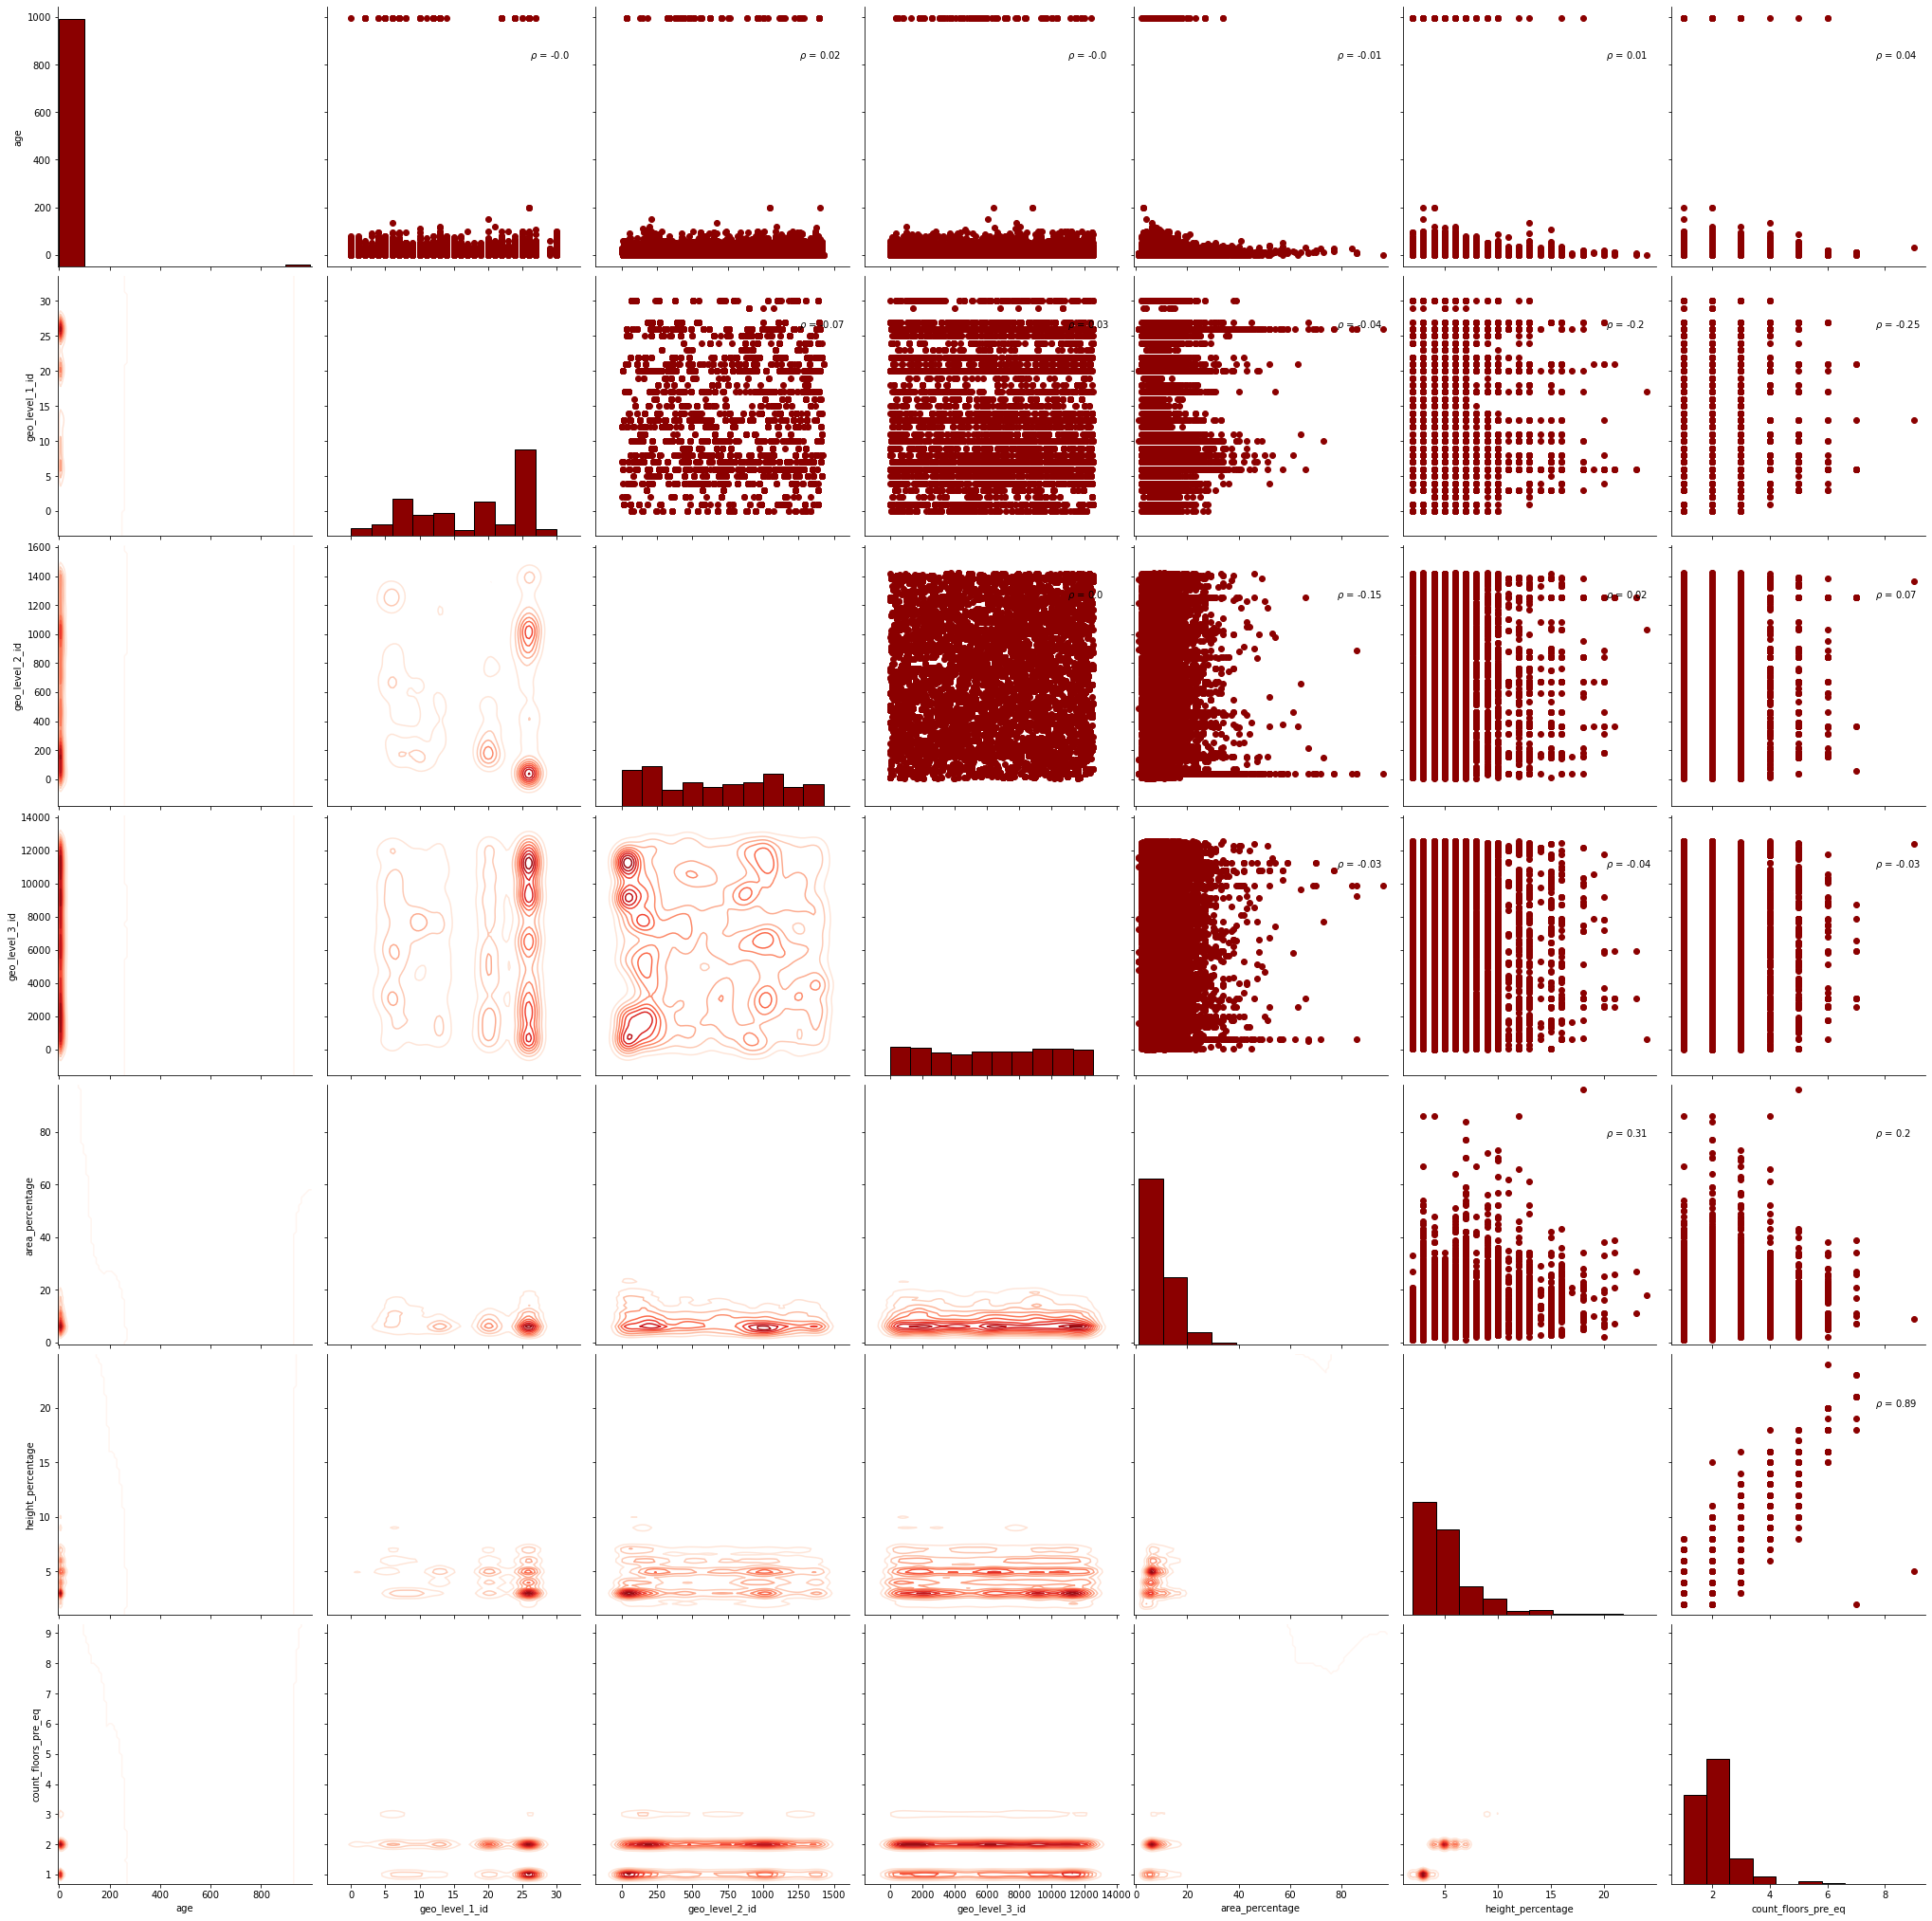

In [40]:
# Create a pair grid instance
grid = sns.PairGrid(data = df[df['damage_grade'] == 1],
                    vars = subset_features, height = 4)

# Map the plots to the locations
grid = grid.map_upper(plt.scatter, color = 'darkred')
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
grid = grid.map_diag(plt.hist, bins = 10, edgecolor =  'k', color = 'darkred');

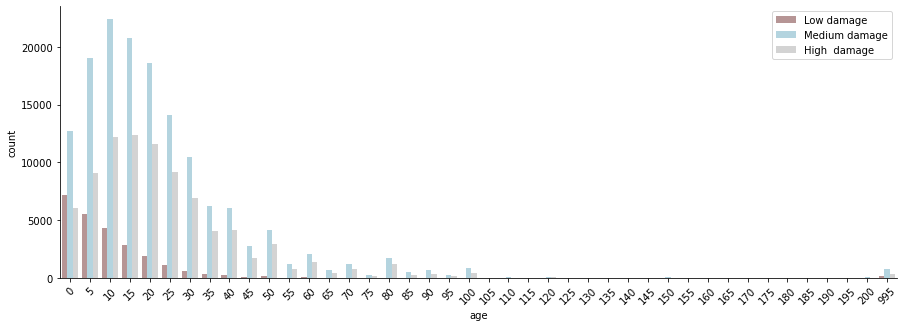

In [41]:
plt.figure(figsize=(15,5))
sns.countplot(x = df["age"], hue = df["damage_grade"], palette = ['rosybrown', 'lightblue', 'lightgrey'])
sns.despine()
plt.legend(["Low damage","Medium damage","High  damage"], loc="upper right")
plt.xticks(rotation=45);

**Remarks:**
- Most buildings are aged 0-50, there is a small cluster of ancient outliers that were labeled as being 995 years old.
- The chart infers that despite the age of building, most of the time the damage caused to the building is medium.

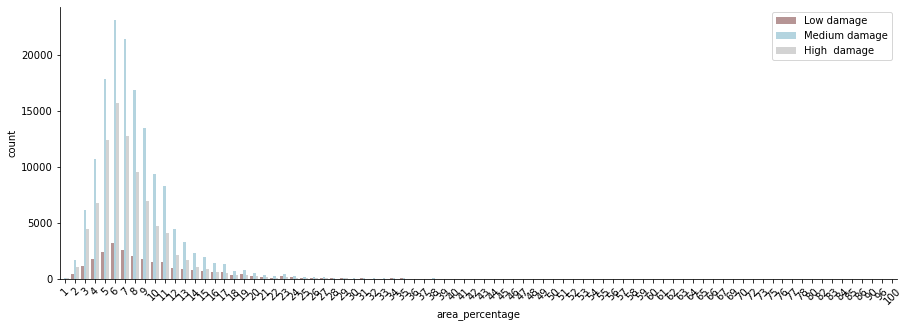

In [42]:
plt.figure(figsize=(15,5))
sns.countplot(x=df["area_percentage"], hue=df["damage_grade"], palette=['rosybrown', 'lightblue', 'lightgrey'])
sns.despine()
plt.legend(["Low damage","Medium damage","High  damage"], loc="upper right")
plt.xticks(rotation=45);

The above plots infers that as the area of the buliding decreases the damaged caused to it increases.

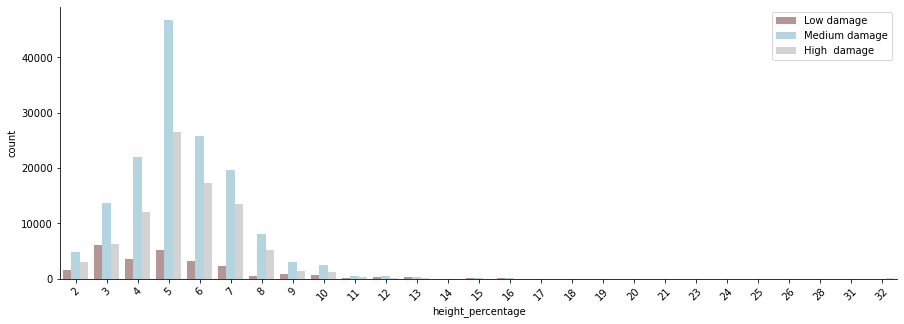

In [43]:
plt.figure(figsize=(15,5))
sns.countplot(x=df["height_percentage"], hue=df["damage_grade"], palette=['rosybrown', 'lightblue', 'lightgrey'])
sns.despine()
plt.legend(["Low damage","Medium damage","High  damage"], loc="upper right")
plt.xticks(rotation=45);

The above plots infers that as the height of the buliding increases the damaged caused to it also increases.

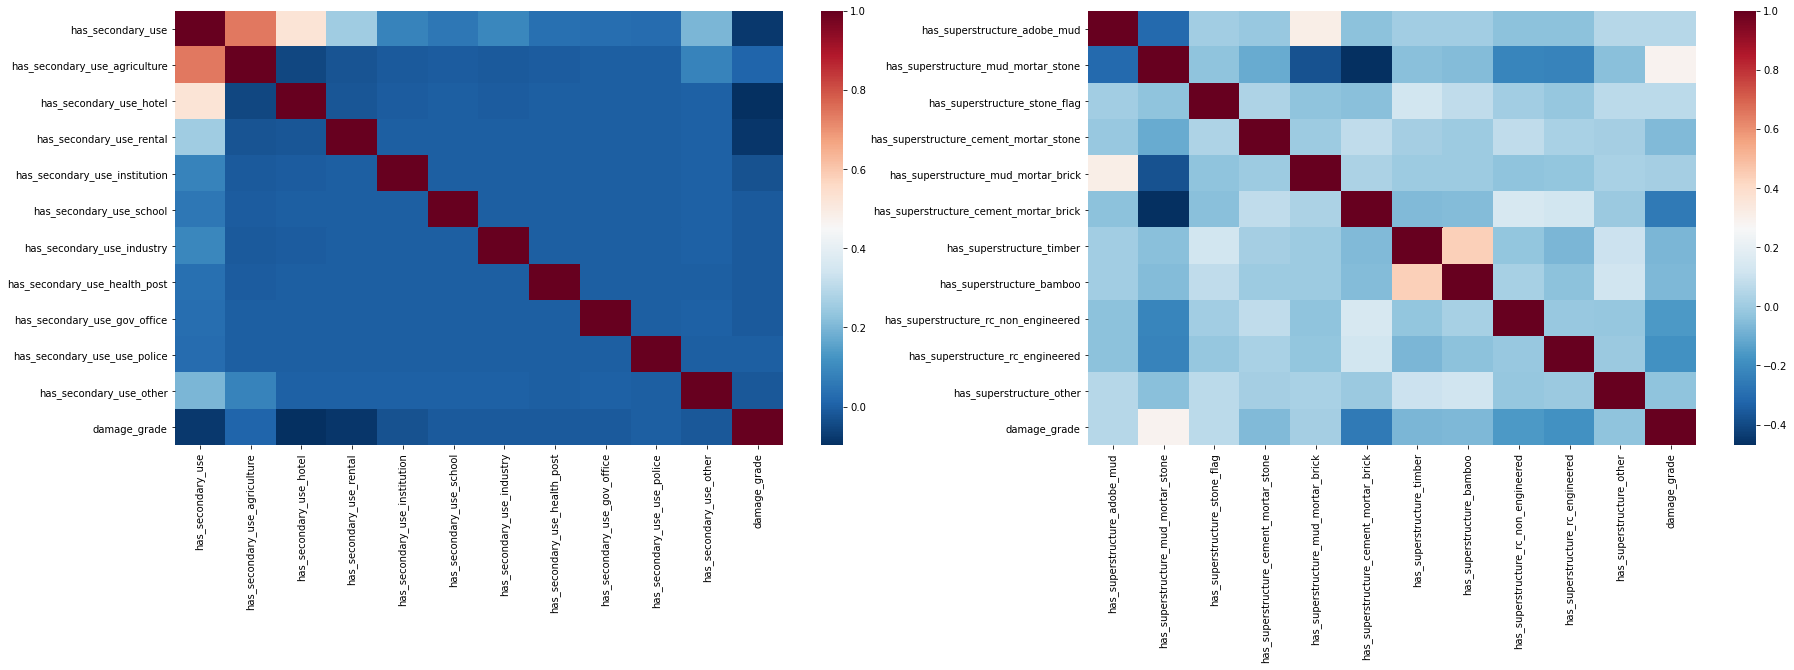

In [44]:
superstructure_corr = df[superstructure_features+['damage_grade']].corr()
secondary_use_corr = df[secondary_use_features+['damage_grade']].corr()

plt.figure(figsize=(30,8))

plt.subplot(1,2,1)
sns.heatmap(secondary_use_corr, cmap="RdBu_r")

plt.subplot(1,2,2)
sns.heatmap(superstructure_corr, cmap="RdBu_r")

Correlation between damages and secondary_use is weak but we can see that there might be something interesting with superstructures

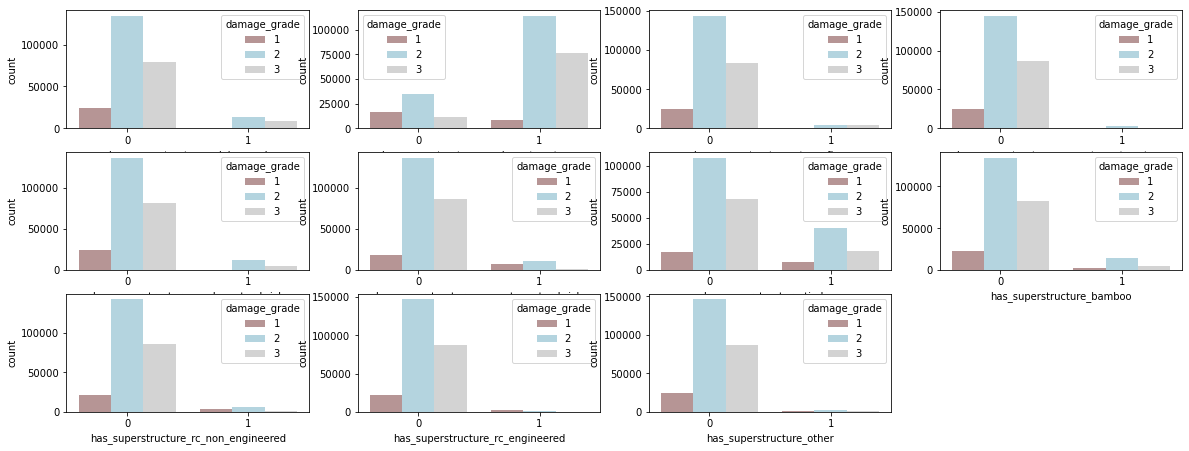

In [45]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(superstructure_features):
    plt.subplot(4, 4, i+1)
    sns.countplot(df[col], hue = df['damage_grade'], palette=['rosybrown', 'lightblue', 'lightgrey'])

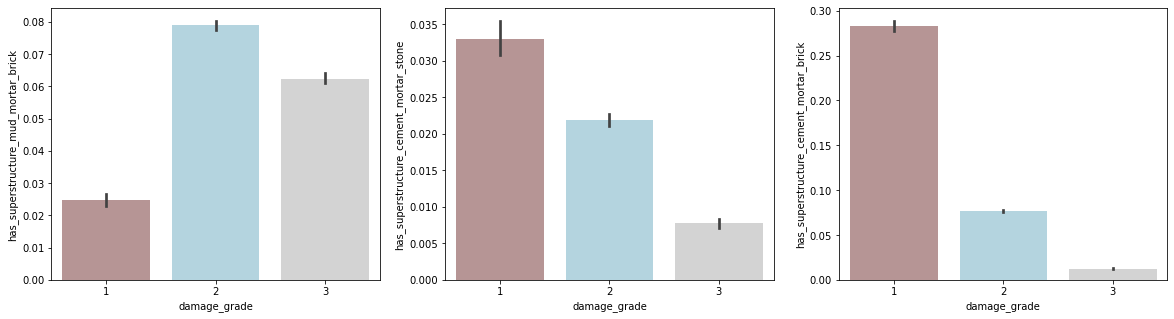

In [46]:
plt.figure(figsize = (20,5))

plt.subplot(1,3,1)
sns.barplot(df['damage_grade'], df['has_superstructure_mud_mortar_brick'], palette=['rosybrown', 'lightblue', 'lightgrey'])

plt.subplot(1,3,2)
sns.barplot(df['damage_grade'], df['has_superstructure_cement_mortar_stone'], palette=['rosybrown', 'lightblue', 'lightgrey'])

plt.subplot(1,3,3)
sns.barplot(df['damage_grade'], df['has_superstructure_cement_mortar_brick'], palette=['rosybrown', 'lightblue', 'lightgrey'])

We can clearly see that mud structures were much more damaged than more solid ones like cement.

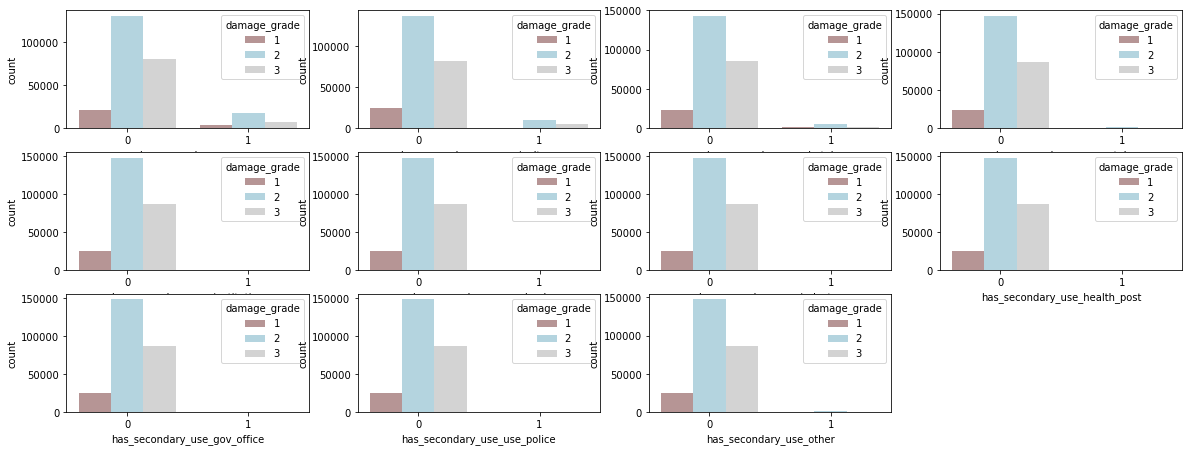

In [47]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(secondary_use_features):
    plt.subplot(4, 4, i+1)
    sns.countplot(df[col],hue = df['damage_grade'], palette=['rosybrown', 'lightblue', 'lightgrey'])

***
**PCA**
***

Principal Components Analysis (PCA) is a well-known unsupervised dimensionality reduction technique that constructs relevant features/variables through linear (linear PCA) or non-linear (kernel PCA) combinations of the original variables (features). 

The construction of relevant features is achieved by linearly transforming correlated variables into a smaller number of uncorrelated variables. This is done by projecting (dot product) the original data into the reduced PCA space using the eigenvectors of the covariance/correlation matrix aka the principal components (PCs).

The resulting projected data are essentially linear combinations of the original data capturing most of the variance in the data (Jolliffe 2002).

In summary, PCA is an orthogonal transformation of the data into a series of uncorrelated data living in the reduced PCA space such that the first component explains the most variance in the data with each subsequent component explaining less.

In [53]:
print('Object data types:\n')
#we'll use the function later, without wanting to print anything
def get_obj(train, p = False):
    obj_types = []
    for column in train.columns:
        if train[column].dtype == 'object': 
            if p: print(column)
            obj_types.append(column)
    return obj_types

Object data types:



In [54]:
obj_types = get_obj(df_train, True)

land_surface_condition
foundation_type
roof_type
ground_floor_type
other_floor_type
position
plan_configuration
legal_ownership_status


In [55]:
def transform_to_int(train, obj_types):
    #Assign dictionaries with current values and replacements for each column
    d_lsc = {'n':0, 'o':1, 't':2}
    d_ft = {'h':0, 'i':1, 'r':2, 'u':3, 'w':4}
    d_rt = {'n':0, 'q':1, 'x':2}
    d_gft = {'f':0, 'm':1, 'v':2, 'x':3, 'z':4}
    d_oft = {'j':0, 'q':1, 's':2, 'x':3}
    d_pos = {'j':0, 'o':1, 's':2, 't':3}
    d_pc = {'a':0, 'c':1, 'd':2, 'f':3, 'm':4, 'n':5, 'o':6, 'q':7, 's':8, 'u':9}
    d_los = {'a':0, 'r':1, 'v':2, 'w':3}
    #Each positional index in replacements corresponds to the column in obj_types
    replacements = [d_lsc, d_ft, d_rt, d_gft, d_oft, d_pos, d_pc, d_los]

    #Replace using lambda Series.map(lambda)
    for i,col in enumerate(obj_types):
        train[col] = train[col].map(lambda a: replacements[i][a]).astype('int64')

In [56]:
transform_to_int(df_train, obj_types)

In [57]:
y_train = df_labels.pop('damage_grade')  
x_train = df_train.drop(["building_id"],axis=1)

In [58]:
from sklearn.preprocessing import StandardScaler
# Z-score the features
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)

In [59]:
from sklearn.decomposition import PCA
# The PCA model
pca = PCA()
x_pca = pca.fit_transform(x_train) # project the original data into the PCA space

In [74]:
print(pca.explained_variance_ratio_.round(2)[:10])

[0.08 0.06 0.05 0.05 0.04 0.03 0.03 0.03 0.03 0.03]


In [63]:
# cumculative sum 
var1 = np.cumsum(np.round(pca.explained_variance_ratio_,decimals = 4) * 100)
print(var1)

[  8.09  14.15  19.35  24.12  27.95  31.09  34.01  36.84  39.57  42.26
  44.92  47.57  50.21  52.85  55.48  58.11  60.72  63.33  65.91  68.44
  70.95  73.43  75.88  78.29  80.65  82.98  85.22  87.38  89.28  91.1
  92.91  94.56  96.06  97.47  98.73  99.47 100.02 100.04]


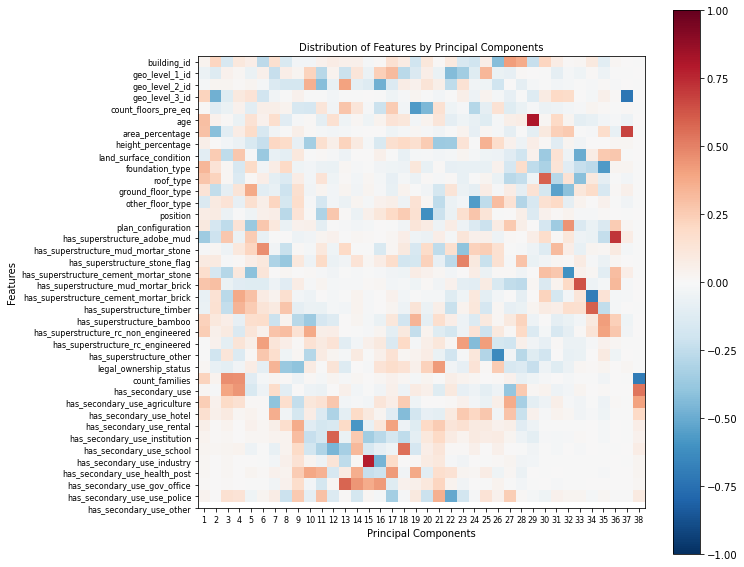

In [66]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(pca.components_.T, cmap="RdBu_r",
           vmin =-1,
           vmax = 1)

plt.yticks(range(len(df_train.columns)), df_train.columns,
           fontsize=8)
plt.xticks(range(n_pcs), range(1, n_pcs+1),
           fontsize=8)
plt.xlabel('Principal Components',
           fontsize=10)
plt.ylabel('Features',
           fontsize=10)
plt.title('Distribution of Features by Principal Components',
          fontsize=10)
plt.colorbar()
plt.show()

In [67]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.2f}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

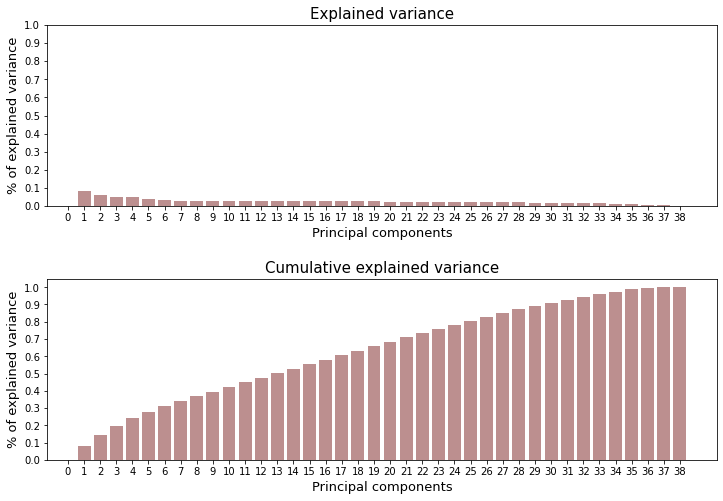

In [69]:
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(wspace=.4, hspace=.4)

ax = fig.add_subplot(2, 1, 1)
rect1 = ax.bar(range(1, 1+pca.n_components_),
       pca.explained_variance_ratio_,
       color='rosybrown')
ax.set(xticks=range(n_pcs+1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Explained variance', fontsize=15)
plt.xlabel('Principal components', fontsize=13)
plt.ylabel('% of explained variance', fontsize=13)

# autolabel(rect1)

ax = fig.add_subplot(2, 1, 2)
rect2 = ax.bar(range(1, 1+pca.n_components_),
       np.cumsum(pca.explained_variance_ratio_),
       color='rosybrown')
ax.set(xticks=range(n_pcs+1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Cumulative explained variance', fontsize=15)
plt.xlabel('Principal components', fontsize=13)
plt.ylabel('% of explained variance', fontsize=13)

# autolabel(rect2)

plt.show()

The PCA plot above measure the PCA for a subset of the numeric variables. Based on the plot, it suggests combining these 8 variables into 6 components. Then these 6 components are able to explain 86% variance. In general, we will pick the high score and combine it into a component for each group which is called “Factor loading”. However, the plot above shows us that some variables have able to load into multiple components such as `geo_level_2_id` and `count_families`. (Cross-loading) 

In [86]:
# original_num_df the original numeric dataframe
# pca is the model
def create_importance_dataframe(pca, original_num_df):

    # Change pcs components ndarray to a dataframe
    importance_df = pd.DataFrame(pca.components_)

    # Assign columns
    importance_df.columns  = original_num_df.columns

    # Change to absolute values
    importance_df = importance_df.apply(np.abs)

    # Transpose
    importance_df = importance_df.transpose()

    # Change column names again

    ## First get number of pcs
    num_pcs = importance_df.shape[1]

    ## Generate the new column names
    new_columns = [f'PC{i}' for i in range(1, num_pcs + 1)]

    ## Now rename
    importance_df.columns = new_columns

    # Return importance df
    return importance_df

In [89]:
# Call function to create importance df
importance_df  = create_importance_dataframe(pca, df_train.drop(["building_id"],axis=1))

# Show first few rows
display(importance_df.head())

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38
geo_level_1_id,0.038883,0.218266,0.160805,0.104330,0.064826,0.260222,0.163392,0.150588,0.023710,0.023736,0.041301,0.076735,0.049337,0.047673,0.017998,0.011809,0.155604,0.085682,0.202718,0.114627,0.015141,0.094443,0.158478,0.203017,0.064404,0.425264,0.417309,0.368428,0.227687,0.211131,0.072487,0.009616,0.019201,0.093919,0.107464,0.016389,0.000251,0.001182
geo_level_2_id,0.059827,0.125484,0.044396,0.016447,0.068840,0.048118,0.228047,0.068731,0.029843,0.225514,0.280852,0.037625,0.216518,0.122055,0.057719,0.238758,0.316279,0.269331,0.142892,0.065916,0.067096,0.436256,0.347242,0.122982,0.328993,0.062566,0.082168,0.011972,0.007095,0.002104,0.092608,0.021485,0.039469,0.013694,0.052400,0.001535,0.002307,0.000472
geo_level_3_id,0.020286,0.023452,0.027248,0.014161,0.029033,0.021124,0.134349,0.178118,0.178345,0.354522,0.423733,0.072696,0.405917,0.097546,0.127996,0.482169,0.134331,0.071738,0.042419,0.131191,0.055363,0.252773,0.141495,0.036758,0.041732,0.196119,0.005990,0.093667,0.022348,0.004183,0.025428,0.016617,0.005462,0.012190,0.014173,0.013350,0.002376,0.000133
count_floors_pre_eq,0.225571,0.481639,0.124752,0.094342,0.134040,0.188069,0.034355,0.004674,0.040098,0.005331,0.001678,0.027827,0.005105,0.002052,0.005788,0.005802,0.043262,0.008877,0.023619,0.006539,0.030114,0.004177,0.057947,0.047002,0.035048,0.019877,0.082958,0.006902,0.131239,0.084511,0.197253,0.183506,0.007300,0.016506,0.047207,0.008163,0.720043,0.000947
age,0.008500,0.111761,0.065390,0.043740,0.108198,0.061825,0.055180,0.039014,0.163605,0.168136,0.121624,0.037448,0.280061,0.119753,0.015016,0.218150,0.255321,0.027048,0.564701,0.451221,0.154909,0.046751,0.009833,0.281838,0.086475,0.144867,0.119287,0.066864,0.009831,0.059969,0.050514,0.024143,0.009154,0.027637,0.014750,0.005828,0.010992,0.000005


In [91]:
# Sort depending on PC of interest

## PC1 top 10 important features
pc1_top_10_features = importance_df['PC1'].sort_values(ascending = False)[:10]
print(), print(f'PC1 top 10 features are \n')
display(pc1_top_10_features )


PC1 top 10 features are 



has_superstructure_mud_mortar_stone       0.357317
roof_type                                 0.331098
area_percentage                           0.300519
height_percentage                         0.289322
ground_floor_type                         0.278445
has_superstructure_cement_mortar_brick    0.278292
has_secondary_use_hotel                   0.249575
has_superstructure_rc_engineered          0.247331
has_superstructure_rc_non_engineered      0.229465
count_floors_pre_eq                       0.225571
Name: PC1, dtype: float64

In [92]:
## PC2 top 10 important features
pc2_top_10_features = importance_df['PC2'].sort_values(ascending = False)[:10]
print(), print(f'PC2 top 10 features are \n')
display(pc2_top_10_features )


PC2 top 10 features are 



count_floors_pre_eq                       0.481639
height_percentage                         0.415738
has_superstructure_cement_mortar_brick    0.299121
foundation_type                           0.250162
other_floor_type                          0.243675
ground_floor_type                         0.223376
geo_level_1_id                            0.218266
has_superstructure_mud_mortar_stone       0.205528
legal_ownership_status                    0.198353
has_superstructure_adobe_mud              0.170744
Name: PC2, dtype: float64

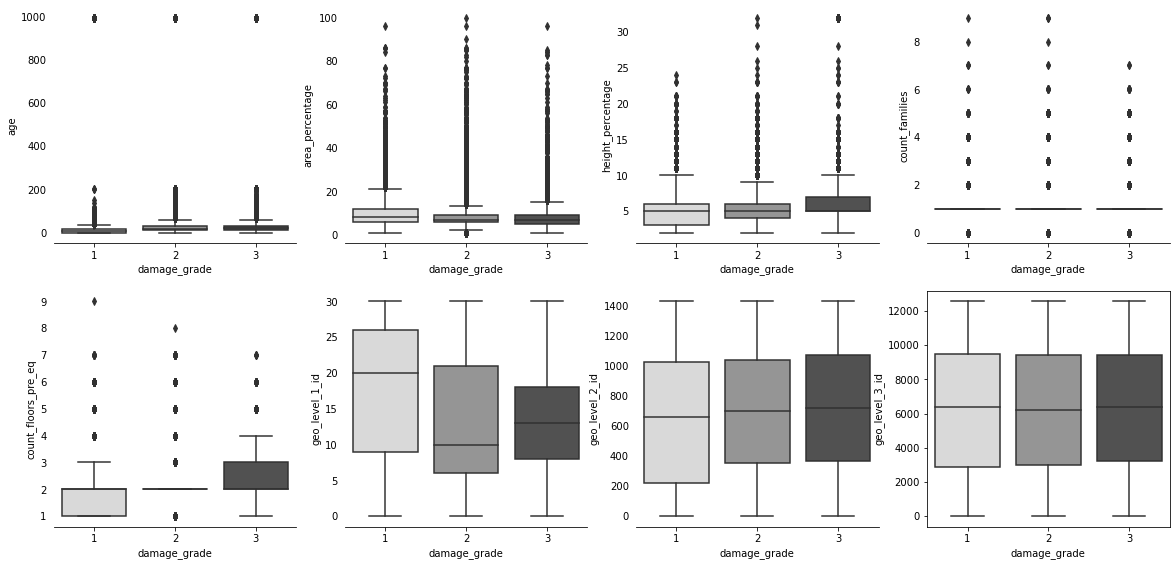

In [70]:
boxplot_cols = ["age","area_percentage","height_percentage","count_families", "count_floors_pre_eq", "geo_level_1_id", "geo_level_2_id", "geo_level_3_id"]
q=1
plt.figure(figsize = (20,20))

for j in boxplot_cols:
    plt.subplot(4,4,q)
    # Remove top and right border
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    # Remove y-axis tick marks
    ax.yaxis.set_ticks_position('none')

    ax=sns.boxplot(y = df[j], x = df['damage_grade'], palette = "Greys")
    q+=1
plt.show()

The box plot here can help us to find out that the `damage_grade` is higher when `count_floors_pre_eq` or `height_percentage` is getting higher. On the other hand, `damage_grade` is getting lower when `geo_level_1_id` is getting higher.

Another advantage of using box plots is outlier identification. At the age box plot there, it indicates some black dots are on the far upper side. It can be removed in the data cleaning section, but we must verify it in the experiment section.